In [ ]:
## import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection & Analysis

In [ ]:
## loading the data from csv file to a pandas  Dataframe
insurance_dataset = pd.read_csv('insurance dataset.csv')
insurance_dataset.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features:
.Sex
.Smoker
.Region

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


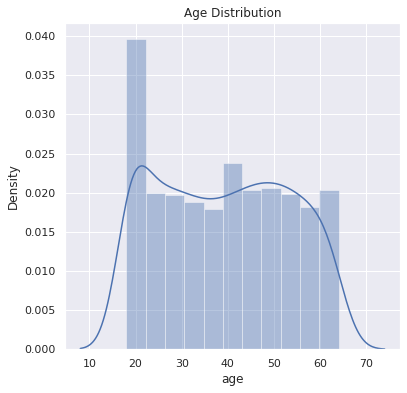

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

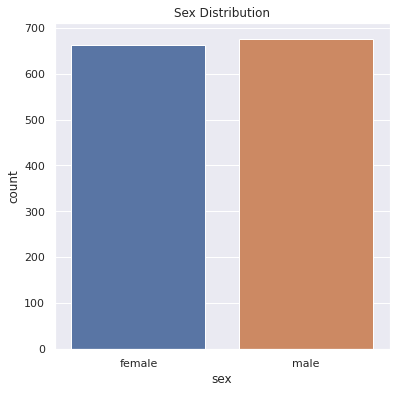

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex',data = insurance_dataset)
plt.title('Sex Distribution')

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


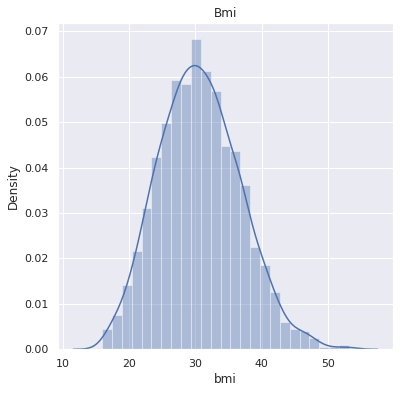

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('Bmi')
plt.show()

Normal BMi range -->18.5to 24.9

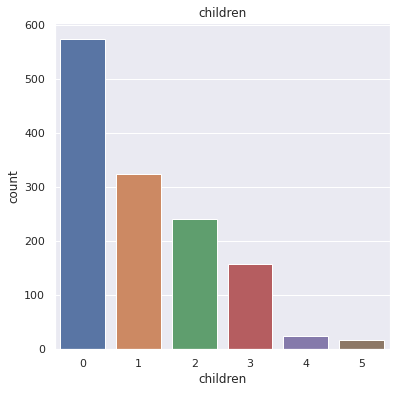

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',  data =insurance_dataset)
plt.title('children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

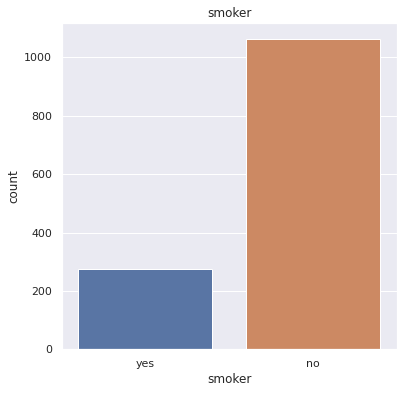

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data= insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

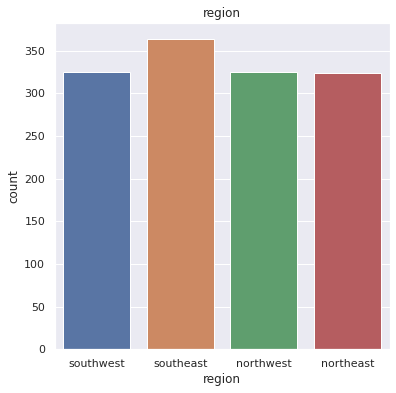

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data = insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


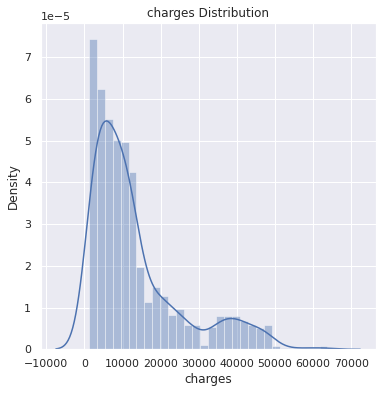

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [ ]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace = True)

In [ ]:
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace = True)

In [ ]:
insurance_dataset.replace({'region':{'northwest':1,'northeast':2, 'southwest':3,'southeast':4}},inplace = True)

In [ ]:
# spliting the features anf Target

X = insurance_dataset.drop(columns='charges',axis=1)
y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       3
1      18    0  33.770         1       1       4
2      28    0  33.000         3       1       4
3      33    0  22.705         0       1       1
4      32    0  28.880         0       1       1
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       1
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       4
1336   21    1  25.800         0       1       3
1337   61    1  29.070         0       0       1

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state= 20)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
# model training

# Linear Regression 

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize= False)

LinearRegression(normalize=False)

In [ ]:
training_data_prediction = regressor.predict(X_train)

In [ ]:
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.7381729420693834


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value :', r2_test)

R squared value : 0.796189914155549


Bulding a predictive system

In [ ]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[4859.39032914]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print('The insurance cost is USD',prediction[0])

The insurance cost is USD 4859.390329136439


In [ ]:
if (prediction[0]==0):
  print('The preson has no insurance')
else:
  print('The person has insurance')

The person has insurance


saving the train model


In [ ]:
import pickle

In [ ]:
filename =  'trained_model.sav'
pickle.dump(regressor,open(filename,'wb'))

In [ ]:
# loading the saved model

loaded_model = pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data = (31,1,25.74,0,1,0)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

if prediction[0]==0:
  print('The person has no insurance')
else:
  print('The person has insurance')

[4859.39032914]
The person has insurance


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
